# Analysis

Monica Canavan

In this notebook we will be performing statistical tests on data pertaining to educational attainment, demographics, and technology (Work in Progress)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import combinations

   
#from scipy.stats import chi2_contingency
#from statsmodels.sandbox.stats.multicomp import multipletests
#from itertools import combinations

### Read the Data Files

In [2]:
# read in dataset for the EDD employment projections
# using excel format instead of csv.  edd_proj = pd.read_csv('edd_sacr_occproj_2018_2028.csv', sep='\t', encoding = 'utf-16')
edd_proj = pd.read_excel('EDD_SAC_OCCPROJ_2018_2028.xlsx', sheet_name='Occupational Summary')

#read in dataset for the Census PUMA Educational Attainment with Race, Ethnicity and Gender RC
education = pd.read_excel('ACSST5Y2019_Educational_Attainment.xlsx', sheet_name='Education')
edd_gender  = pd.read_excel('ACSST5Y2019_Educational_Attainment.xlsx', sheet_name='Gender Data Summary')
edd_race = pd.read_excel('ACSST5Y2019_Educational_Attainment.xlsx', sheet_name='Race Data Summary')
edd_ethnicity = pd.read_excel('ACSST5Y2019_Educational_Attainment.xlsx', sheet_name='Ethnicity Data Summary')

#read in dataset for the Census Technology Information RC
technology = pd.read_excel('ACSST1Y2019_Technology_RC.xlsx', sheet_name='Technology')

### Begin data analysis of EDD Occupation Projections

Analyze the relationship of entry level education with occupations anticipated to decrease.  

The datafile that has been read already has converted Entry Level Education to numeric values ranging from 1 (Less than HS) to 5 (Graduate Level).

In [3]:
#Check the datatypes
edd_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SOC Level                                635 non-null    int64  
 1   SOC Code                                 635 non-null    object 
 2   Occupational Title                       635 non-null    object 
 3   Base Year Employment Estimate 2018       635 non-null    int64  
 4   Projected Year Employment Estimate 2028  635 non-null    int64  
 5   Numeric Change 2018-2028                 635 non-null    int64  
 6   Percent-age Change 2018-2028             635 non-null    float64
 7   Exits                                    635 non-null    int64  
 8   Transfers                                635 non-null    int64  
 9   Total Job Openings                       635 non-null    int64  
 10  Median Hourly Wages                      635 non-n

In [4]:
#Create a DF for SOC Level 4 only (detail level which indicates Entry Level Education)
edd_proj = edd_proj[edd_proj['SOC Level'] == 4].copy()
edd_proj.shape

(520, 24)

In [5]:
#Creating a DF for the test, reducing to needed columns
cols = [5,12]
edd_proj = edd_proj[edd_proj.columns[cols]]
edd_proj

,Numeric Change 2018-2028,Entry Level Education
3,-350,4.0
4,1220,4.0
5,-10,4.0
7,0,4.0
8,150,4.0
...,...,...
630,4560,1.0
631,-80,1.0
632,230,1.0
633,80,1.0


In [6]:
#Convert 'Entry Level Education' to integer
edd_proj['Entry Level Education'] = edd_proj['Entry Level Education'].astype(np.int64)

In [7]:
#Check the datatypes
edd_proj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 3 to 634
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Numeric Change 2018-2028  520 non-null    int64
 1   Entry Level Education     520 non-null    int64
dtypes: int64(2)
memory usage: 12.2 KB


In [8]:
#Reduce dataset to occupations projected to decrease.  Remove rows with increases in jobs.
edd_proj = edd_proj[edd_proj['Numeric Change 2018-2028'] < 0]  

edd_proj

,Numeric Change 2018-2028,Entry Level Education
3,-350,4
5,-10,4
22,-100,2
37,-100,4
38,-190,2
...,...,...
596,-40,2
598,-60,2
616,-10,2
617,-10,2


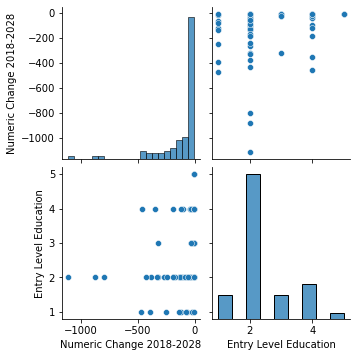

In [9]:
sns.pairplot(edd_proj)

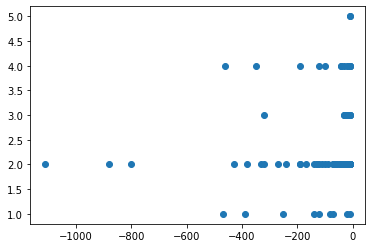

In [275]:
plt.scatter(edd_proj['Numeric Change 2018-2028'], edd_proj['Entry Level Education'])
plt.show()

#### Spearman Rank Test, Numeric Change 2018-2028 and Entry Level Education

In [267]:
# calculate spearman's correlation
coef, p = stats.spearmanr('Numeric Change 2018-2028', 'Entry Level Education')
#result = stats.spearmanr('Numeric Change 2018-2028', 'Entry Level Education')
coef

nan

In [247]:
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: nan
Samples are correlated (reject H0) p=nan


Spearman Rank Test is not appropriate for this data as the Entry education level is actually categorical data, not numerical.  

#### ANOVA Test, Numeric Change 2018-2028 and Entry Level Education

In [46]:
# Group occupation data by education levels
groups = edd_proj.groupby('Entry Level Education').groups


In [44]:
# Extract individual groups
Less_HS = edd_proj['Numeric Change 2018-2028'][groups[1]]
HS_GED = edd_proj['Numeric Change 2018-2028'][groups[2]]
Some_College = edd_proj['Numeric Change 2018-2028'][groups[3]]
BA = edd_proj['Numeric Change 2018-2028'][groups[4]]
Graduate = edd_proj['Numeric Change 2018-2028'][groups[5]]

# Perform the ANOVA
stats.f_oneway(Less_HS, HS_GED, Some_College, BA, Graduate)

F_onewayResult(statistic=0.651243201309168, pvalue=0.6276284053747949)

In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)
                sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary
# output (ANOVA F and p value)
                 df   sum_sq   mean_sq         F    PR(>F)
C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
Residual       16.0   918.00    57.375       NaN       NaN

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

### Analysis of Educational Attainment with Gender, Race and Ethnicity


In [134]:
#Check first several rows
education.head()

,Race,Ethnicity,Educational attainment,Total,Male,Female
0,White,Not Hispanic,Less Than HS,2288,1212,1076
1,White,Not Hispanic,HS or GED,9339,4588,4751
2,White,Not Hispanic,Some college and AA,16757,7939,8818
3,White,Not Hispanic,BA,9102,4691,4411
4,White,Not Hispanic,Graduate School,4493,2467,2026


In [135]:
#Check the datatypes
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Race                    90 non-null     object
 1   Ethnicity               90 non-null     object
 2   Educational attainment  90 non-null     object
 3   Total                   90 non-null     int64 
 4   Male                    90 non-null     int64 
 5   Female                  90 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 4.3+ KB


#### Chi Square Test, Gender and Educational Attainment

Statistical test: Using the chi square contingency test since our data is categorical, and we have more than 2 samples to compare. This test will test for a relationship between two categorical variables.

Reference for the Chi2 Test and Post Hoc Tests:
https://neuhofmo.github.io/chi-square-and-post-hoc-in-python/

In [136]:
#Testing to create df for Chi2 Test
edd_gender = edd_gender.set_index('Educational attainment')
edd_gender

,Male,Female
Educational attainment,,
Less Than HS,3639,3440
HS or GED,7926,8598
BA,8365,8791
Some college and AA,13702,14999
Graduate School,3833,3589


In [137]:
#Created df manually for gender observed results

chi2, p, dof, table = stats.chi2_contingency(edd_gender, correction=True)

print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

print('\nDegrees of Freedom: ', '%1.2f' % dof)
print('\nP-Value: ', '%1.2f' % p)
print('\nContingency Table: \n', table)

print('\nResult of Statistical Test:')

if p > 0.05:
    print('Null Hypothesis (H0) accepted - Proportion of smokers are equal across the four regions.')
else:
    print('Null Hypothesis (H0) rejected (Alternate Hypothesis (HA) accepted)')

Chi2 result of the contingency table: 60.61284285764862, p-value: 2.1563628164015564e-12

Degrees of Freedom:  4.00

P-Value:  0.00

Contingency Table: 
 [[ 3449.63365937  3629.36634063]
 [ 8052.23147161  8471.76852839]
 [ 8360.20837127  8795.79162873]
 [13986.14714758 14714.85285242]
 [ 3616.77935017  3805.22064983]]

Result of Statistical Test:
Null Hypothesis (H0) rejected (Alternate Hypothesis (HA) accepted)


OBSERVATIONS:

Our P value was 0 which is < 0.05, Therefore, we reject our null hypothesis.


##### Chi Square post-hoc test

In [138]:
# gathering all combinations for post-hoc chi2
all_combinations = list(combinations(edd_gender.index, 2))
print("Significance results:")
for comb in all_combinations:
    # subset df into a dataframe containing only the pair "comb"
    new_df = edd_gender[(edd_gender.index == comb[0]) | (edd_gender.index == comb[1])]
    # running chi2 test
    chi2, p, dof, ex = stats.chi2_contingency(new_df, correction=False)
    print(f"Chi2 result for pair {comb}: {chi2}, p-value: {p}")

Significance results:
Chi2 result for pair ('Less Than HS', 'HS or GED'): 23.453709198338906, p-value: 1.279557809168113e-06
Chi2 result for pair ('Less Than HS', 'BA'): 14.04715192464218, p-value: 0.0001782836285264895
Chi2 result for pair ('Less Than HS', 'Some college and AA'): 30.53950996486656, p-value: 3.271359170843116e-08
Chi2 result for pair ('Less Than HS', 'Graduate School'): 0.08230561249178216, p-value: 0.7741968940853147
Chi2 result for pair ('HS or GED', 'BA'): 2.1133691470772638, p-value: 0.14601753009219848
Chi2 result for pair ('HS or GED', 'Some college and AA'): 0.21483646532172798, p-value: 0.6430027561944077
Chi2 result for pair ('HS or GED', 'Graduate School'): 27.709506855239773, p-value: 1.4096823143470299e-07
Chi2 result for pair ('BA', 'Some college and AA'): 4.456953819599445, p-value: 0.03475943115166249
Chi2 result for pair ('BA', 'Graduate School'): 17.252784444297802, p-value: 3.2721765733960886e-05
Chi2 result for pair ('Some college and AA', 'Graduate 

In [139]:
# gathering all combinations for post-hoc chi2
all_combinations = list(combinations(edd_gender.index, 2))
p_vals = []
for comb in all_combinations:
    # subset df into a dataframe containing only the pair "comb"
    new_df = edd_gender[(edd_gender.index == comb[0]) | (edd_gender.index == comb[1])]
    # running chi2 test
    chi2, p, dof, ex = stats.chi2_contingency(new_df, correction=True)
    p_vals.append(p)

In [140]:
from statsmodels.sandbox.stats.multicomp import multipletests

reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]

In [141]:
print("original p-value\tcorrected p-value\treject?")
for p_val, corr_p_val, reject in zip(p_vals, corrected_p_vals, reject_list):
    print(p_val, "\t", corr_p_val, "\t", reject)

original p-value	corrected p-value	reject?
1.3743060523327423e-06 	 3.4357651308318555e-06 	 True
0.00018859270440316333 	 0.0003143211740052722 	 True
3.5280891764537006e-08 	 1.7640445882268503e-07 	 True
0.7869536061793635 	 0.7869536061793635 	 False
0.14906625109338095 	 0.18633281386672618 	 False
0.6500231478253293 	 0.7222479420281437 	 False
1.5209382716757712e-07 	 5.069794238919238e-07 	 True
0.03559774339242139 	 0.05085391913203056 	 False
3.476792635622653e-05 	 6.953585271245306e-05 	 True
2.1728686809545843e-09 	 2.172868680954584e-08 	 True


In [142]:
def get_asterisks_for_pval(p_val):
    """Receives the p-value and returns asterisks string."""
    if p_val > 0.05:
        p_text = "ns"  # above threshold => not significant
    elif p_val < 1e-4:  
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'
    
    return p_text

In [143]:
def chisq_and_posthoc_corrected(df):
    """Receives a dataframe and performs chi2 test and then post hoc.
    Prints the p-values and corrected p-values (after FDR correction)"""
    # start by running chi2 test on the matrix
    chi2, p, dof, ex = stats.chi2_contingency(edd_gender, correction=True)
    print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
    
    # post-hoc
    all_combinations = list(combinations(edd_gender.index, 2))  # gathering all combinations for post-hoc chi2
    p_vals = []
    print("Significance results:")
    for comb in all_combinations:
        new_df = edd_gender[(edd_gender.index == comb[0]) | (edd_gender.index == comb[1])]
        chi2, p, dof, ex = stats.chi2_contingency(new_df, correction=True)
        p_vals.append(p)
        # print(f"For {comb}: {p}")  # uncorrected

    # checking significance
    # correction for multiple testing
    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject: {reject}")

In [144]:
chisq_and_posthoc_corrected(edd_gender)

Chi2 result of the contingency table: 60.61284285764862, p-value: 2.1563628164015564e-12
Significance results:
('Less Than HS', 'HS or GED'): p_value: 0.000001; corrected: 0.000003 (****) reject: True
('Less Than HS', 'BA'): p_value: 0.000189; corrected: 0.000314 (***) reject: True
('Less Than HS', 'Some college and AA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Less Than HS', 'Graduate School'): p_value: 0.786954; corrected: 0.786954 (ns) reject: False
('HS or GED', 'BA'): p_value: 0.149066; corrected: 0.186333 (ns) reject: False
('HS or GED', 'Some college and AA'): p_value: 0.650023; corrected: 0.722248 (ns) reject: False
('HS or GED', 'Graduate School'): p_value: 0.000000; corrected: 0.000001 (****) reject: True
('BA', 'Some college and AA'): p_value: 0.035598; corrected: 0.050854 (*) reject: False
('BA', 'Graduate School'): p_value: 0.000035; corrected: 0.000070 (****) reject: True
('Some college and AA', 'Graduate School'): p_value: 0.000000; corrected: 0.0000

#### Chi Square Test Race and Educational Attainment

In [148]:
edd_race = edd_race.set_index('Educational attainment')
edd_race

,"Native American, Alaskan, Hawaiian",Asian,Black or African American,Some Other Race,Two or More Races,White
Educational attainment,,,,,,
Less Than HS,139,1045,411,1479,285,3720
HS or GED,337,1470,1648,1329,688,11052
Some college/AA,552,3055,3235,1372,1412,19075
BA,67,4093,1041,540,1025,10390
Graduate School,21,1458,658,79,323,4883


In [150]:
#Created df manually for race observed results

chi2, p, dof, table = stats.chi2_contingency(edd_race, correction=True)

print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

print('\nDegrees of Freedom: ', '%1.2f' % dof)
print('\nP-Value: ', '%1.2f' % p)
print('\nContingency Table: \n', table)

print('\nResult of Statistical Test:')

if p > 0.05:
    print('Null Hypothesis (H0) accepted - Proportion of smokers are equal across the four regions.')
else:
    print('Null Hypothesis (H0) rejected (Alternate Hypothesis (HA) accepted)')

Chi2 result of the contingency table: 6052.540649604183, p-value: 0.0

Degrees of Freedom:  20.00

P-Value:  0.00

Contingency Table: 
 [[  102.75700424  1023.97907182   643.88864754   441.87353347
    343.72033766  4522.78140527]
 [  239.85827632  2390.20061913  1502.98290887  1031.43357353
    802.32163575 10557.20298639]
 [  416.61658125  4151.60663094  2610.57325512  1791.52596186
   1393.57499805 18337.10257277]
 [  249.03223121  2481.61957285  1560.46809396  1070.88322364
    833.00835046 10960.98852787]
 [  107.73590697  1073.59410525   675.08709451   463.2837075
    360.37467808  4741.92450769]]

Result of Statistical Test:
Null Hypothesis (H0) rejected (Alternate Hypothesis (HA) accepted)


##### Chi Square post-hoc test Race

In [160]:
def chisq_and_posthoc_corrected(df):
    """Receives a dataframe and performs chi2 test and then post hoc.
    Prints the p-values and corrected p-values (after FDR correction)"""
    # start by running chi2 test on the matrix
    chi2, p, dof, ex = stats.chi2_contingency(edd_race, correction=True)
    print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
    
    # post-hoc
    all_combinations = list(combinations(edd_race.index, 2))  # gathering all combinations for post-hoc chi2
    p_vals = []
    print("Significance results:")
    for comb in all_combinations:
        new_df = edd_race[(edd_race.index == comb[0]) | (edd_race.index == comb[1])]
        chi2, p, dof, ex = stats.chi2_contingency(new_df, correction=True)
        p_vals.append(p)
        # print(f"For {comb}: {p}")  # uncorrected

    # checking significance
    # correction for multiple testing
    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject: {reject}")

In [161]:
chisq_and_posthoc_corrected(edd_race)

Chi2 result of the contingency table: 6052.540649604183, p-value: 0.0
Significance results:
('Less Than HS', 'HS or GED'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Less Than HS', 'Some college/AA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Less Than HS', 'BA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Less Than HS', 'Graduate School'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('HS or GED', 'Some college/AA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('HS or GED', 'BA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('HS or GED', 'Graduate School'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Some college/AA', 'BA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Some college/AA', 'Graduate School'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('BA', 'Graduate School'): p_value: 0.000000; corrected: 0.000000 (****) reject: True


#### Chi Square Test Ethnicity and Educational Attainment


In [149]:
edd_ethnicity = edd_ethnicity.set_index('Educational attainment')
edd_ethnicity

,Hispanic,Not Hispanic
Educational attainment,,
Less Than HS,2951,4128
HS or GED,3263,13261
Some college and AA,4171,24530
BA,1913,15243
Graduate School,575,6847


In [155]:
#Created df manually for ethnicity observed results

chi2, p, dof, table = stats.chi2_contingency(edd_ethnicity, correction=True)

print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")

print('\nDegrees of Freedom: ', '%1.2f' % dof)
print('\nP-Value: ', '%1.2f' % p)
print('\nContingency Table: \n', table)

print('\nResult of Statistical Test:')

if p > 0.05:
    print('Null Hypothesis (H0) accepted - Proportion of smokers are equal across the four regions.')
else:
    print('Null Hypothesis (H0) rejected (Alternate Hypothesis (HA) accepted)')

Chi2 result of the contingency table: 4182.8245760772925, p-value: 0.0

Degrees of Freedom:  4.00

P-Value:  0.00

Contingency Table: 
 [[ 1185.29651934  5893.70348066]
 [ 2766.75232174 13757.24767826]
 [ 4805.64986603 23895.35013397]
 [ 2872.57339819 14283.42660181]
 [ 1242.7278947   6179.2721053 ]]

Result of Statistical Test:
Null Hypothesis (H0) rejected (Alternate Hypothesis (HA) accepted)


##### Chi Square post-hoc test Ethnicity

In [158]:
def chisq_and_posthoc_corrected(df):
    """Receives a dataframe and performs chi2 test and then post hoc.
    Prints the p-values and corrected p-values (after FDR correction)"""
    # start by running chi2 test on the matrix
    chi2, p, dof, ex = stats.chi2_contingency(edd_ethnicity, correction=True)
    print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
    
    # post-hoc
    all_combinations = list(combinations(edd_ethnicity.index, 2))  # gathering all combinations for post-hoc chi2
    p_vals = []
    print("Significance results:")
    for comb in all_combinations:
        new_df = edd_ethnicity[(edd_ethnicity.index == comb[0]) | (edd_ethnicity.index == comb[1])]
        chi2, p, dof, ex = stats.chi2_contingency(new_df, correction=True)
        p_vals.append(p)
        # print(f"For {comb}: {p}")  # uncorrected

    # checking significance
    # correction for multiple testing
    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject: {reject}")

In [159]:
chisq_and_posthoc_corrected(edd_ethnicity)

Chi2 result of the contingency table: 4182.8245760772925, p-value: 0.0
Significance results:
('Less Than HS', 'HS or GED'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Less Than HS', 'Some college and AA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Less Than HS', 'BA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Less Than HS', 'Graduate School'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('HS or GED', 'Some college and AA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('HS or GED', 'BA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('HS or GED', 'Graduate School'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Some college and AA', 'BA'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('Some college and AA', 'Graduate School'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('BA', 'Graduate School'): p_value: 0.000000; corrected: 0.000000 (****) re

### Analysis of Technology Resources

In [6]:
print(technology.shape)

(9, 6)


In [7]:
#Check first several rows
technology.head()

,Label,Description,Type,Total Estimate,Percent Estimate,Unnamed: 5
0,Total households,NaN,NaN,40662,(X),179199.0
1,TYPES OF COMPUTER,Has one or more types of computing devices:,ANY,39135,96.2%,40662.0
2,TYPES OF COMPUTER,Has one or more types of computing devices:,Desktop or laptop,33599,82.6%,97875.0
3,TYPES OF COMPUTER,Has one or more types of computing devices:,Smartphone,37031,91.1%,NaN
4,TYPES OF COMPUTER,Has one or more types of computing devices:,Tablet or other portable wireless computer,26437,65.0%,NaN


In [8]:
#Check the column headings
technology.columns

Index(['Label', 'Description', 'Type', 'Total Estimate', 'Percent Estimate',
       'Unnamed: 5'],
      dtype='object')

In [9]:
#Check the datatypes
technology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Label             9 non-null      object 
 1   Description       8 non-null      object 
 2   Type              5 non-null      object 
 3   Total Estimate    9 non-null      int64  
 4   Percent Estimate  9 non-null      object 
 5   Unnamed: 5        3 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 560.0+ bytes


####  Test

In [47]:
stats.power_divergence([16, 18, 16, 14, 12, 12], lambda_='log-likelihood')
#(2.006573162632538, 0.84823476779463769)

Power_divergenceResult(statistic=2.006573162632538, pvalue=0.8482347677946377)

In [48]:
#stats.power_divergence([16, 18, 16, 14, 12, 12], lambda_='log-likelihood')
obs = np.array([[3436, 979], [15613, 863], [19188, 583]]).T
obs.shape

(2, 3)

In [51]:
stats.power_divergence(obs, lambda_="log-likelihood", axis = None)

Power_divergenceResult(statistic=51126.8174371155, pvalue=0.0)